In [1]:
### uncomment to display figures
# %matplotlib inline

# Demonstrates benchmarking functionality - wunsat - ASCAT

In [2]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt

## Set up comparison
comparing against observed streamflow

In [3]:
data_path = '../../test_data/benchmarking/'
obs_csv = data_path+'/ascat/sm_ascat.csv'
catchment_csv = data_path+'/catchment_ids.csv'
id_list=read_id_csv(catchment_csv)

b = Benchmark("ASCAT", "wunsat")
b.load(obs_csv, id_list=id_list)

In [4]:
b.sites

['116008',
 '111101',
 '113004',
 '112102',
 '108003',
 '107002',
 '109001',
 '5115',
 '4508',
 '105001']

## Add models to the comparison
read data from pre-processed csv

In [5]:
csv_data = data_path+'/amsre/awral_wunsat.csv'
b.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data)

### Show list of loaded or selected models
can "select" or "unselect" models for displaying

In [6]:
b.benchmark.selection

['AWRAMSI_v4_0_AWRAL']

In [7]:
b.benchmark.selection.AWRAMSI_v4_0_AWRAL.unselect()
b.benchmark.selection.AWRAMSI_v4_0_AWRAL.select()

## Regression plotting
specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments


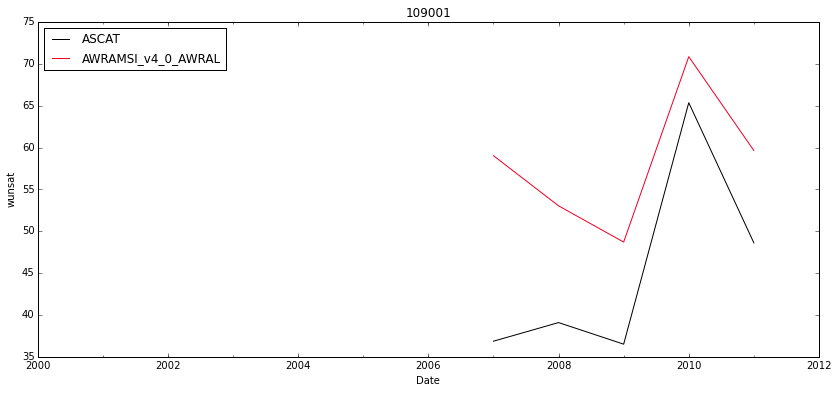

In [8]:
p = b.benchmark.plot_timeseries(u'109001', freq='y')

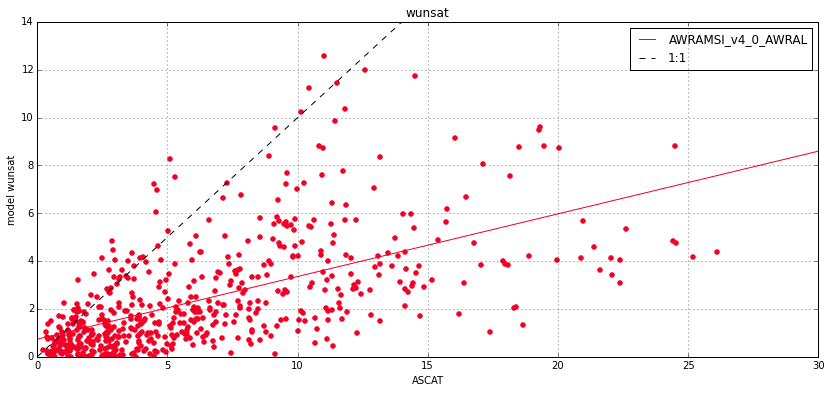

In [9]:
p = b.benchmark.plot_regression(title="wunsat", freq='m', xlim=[0,None],ylim=[0,None])

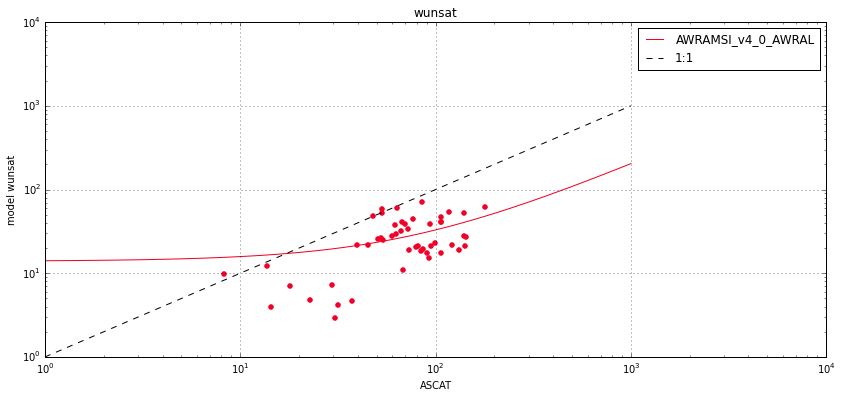

In [10]:
p = b.benchmark.plot_regression(title="wunsat", freq='y', yscale='log', xscale='log')

## Statistics plotting
specify statistic type and frequency

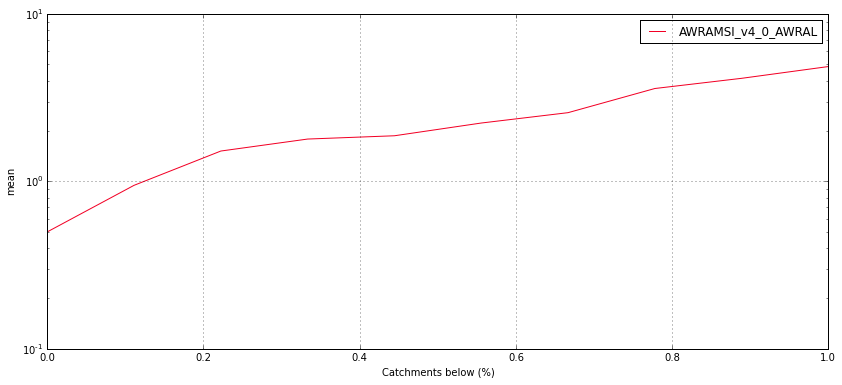

In [11]:
p = b.benchmark.plot_cdf('mean', freq='m', yscale='log')

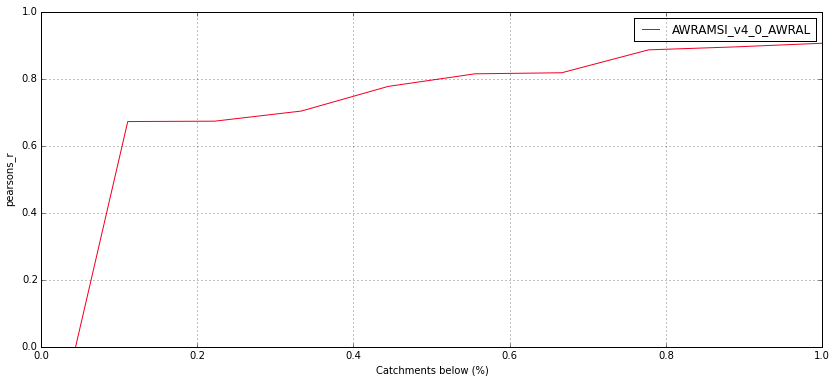

In [12]:
p = b.benchmark.plot_cdf('pearsons_r', freq='m', ylim=[0,1])

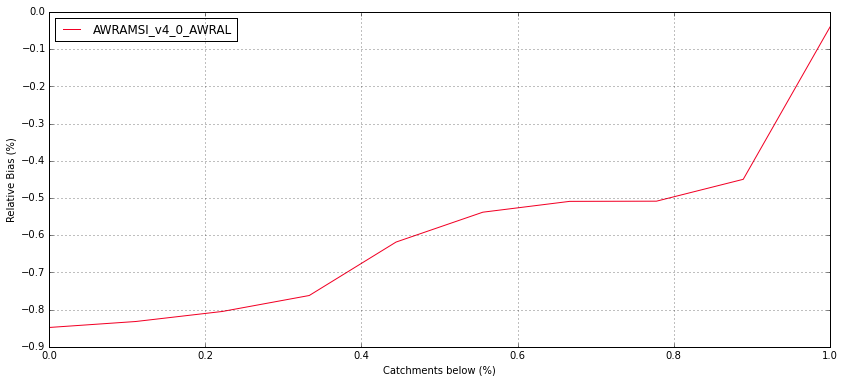

In [13]:
p = b.benchmark.plot_cdf('bias_relative',freq='m', ylabel='Relative Bias (%)')

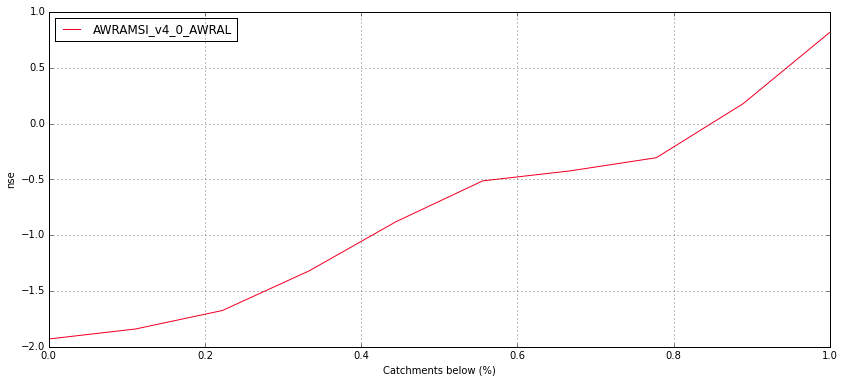

In [14]:
p = b.benchmark.plot_cdf('nse',freq='m') #, ylim=[0,1])

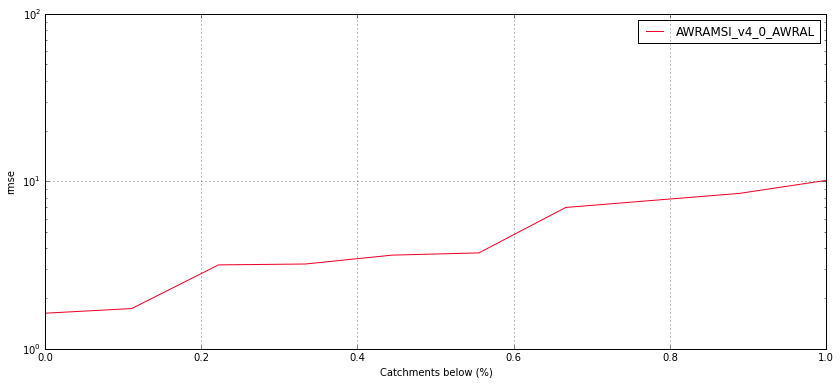

In [15]:
p = b.benchmark.plot_cdf('rmse',freq='m', yscale='log')

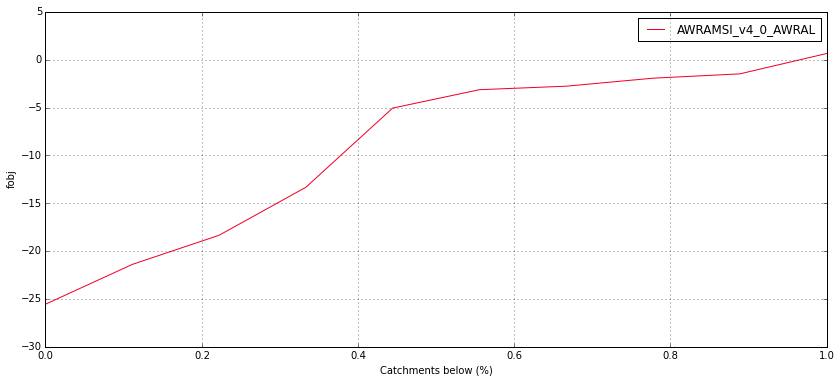

In [16]:
p = b.benchmark.plot_cdf('fobj',freq='d') #, ylim=[0,1])

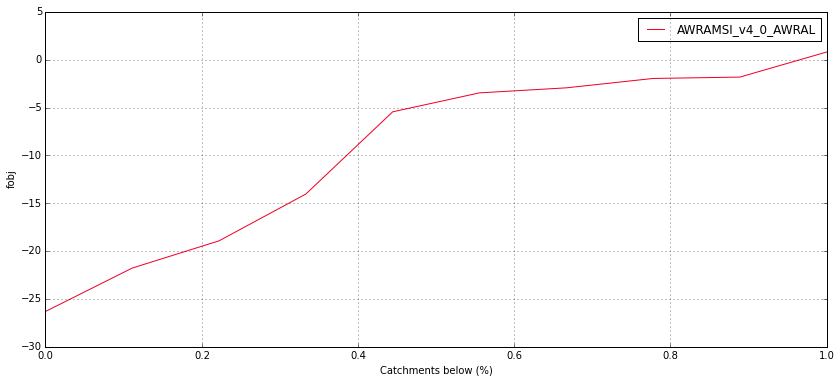

In [17]:
p = b.benchmark.plot_cdf('fobj',freq='m') #, ylim=[0,1])

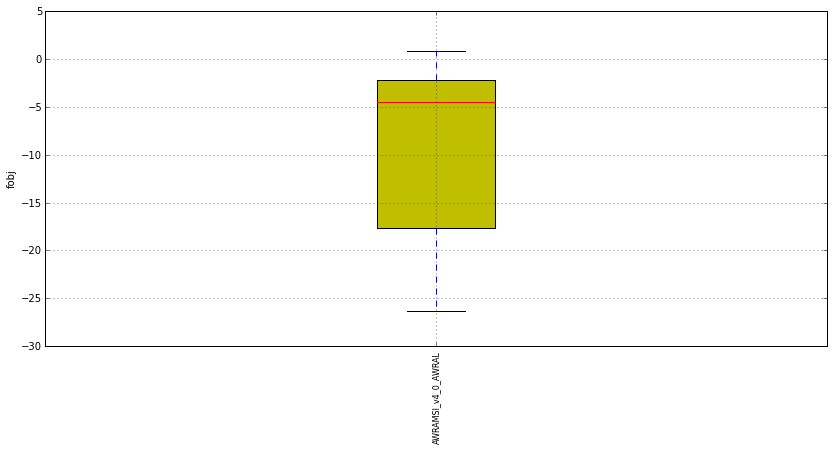

In [18]:
b.benchmark.models.AWRAMSI_v4_0_AWRAL.colour = 'y'
p = b.benchmark.plot_box('fobj', freq='m') #, ylim=[0,1])

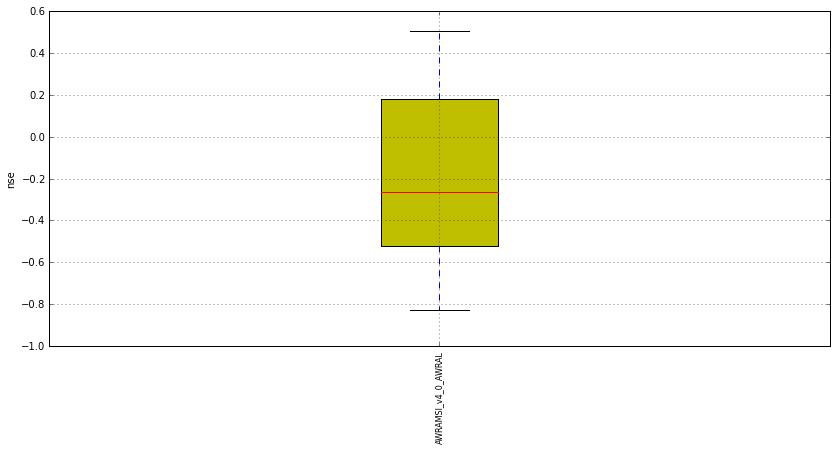

In [19]:
p = b.benchmark.plot_box('nse', freq='d')

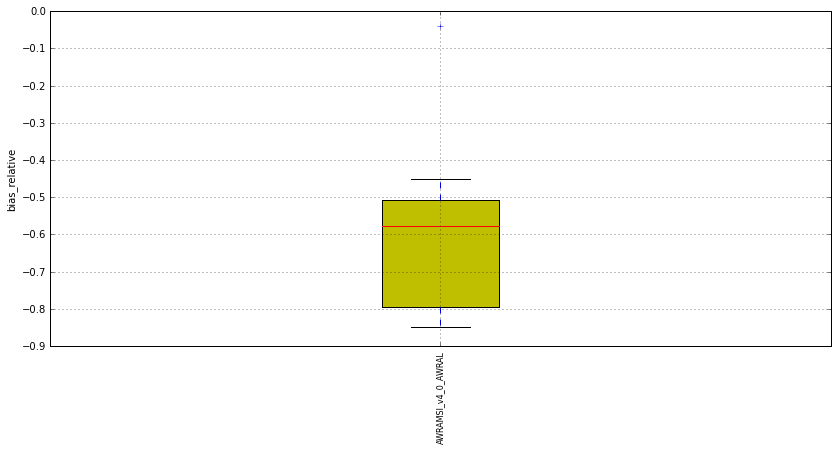

In [20]:
p = b.benchmark.plot_box('bias_relative', freq='m')

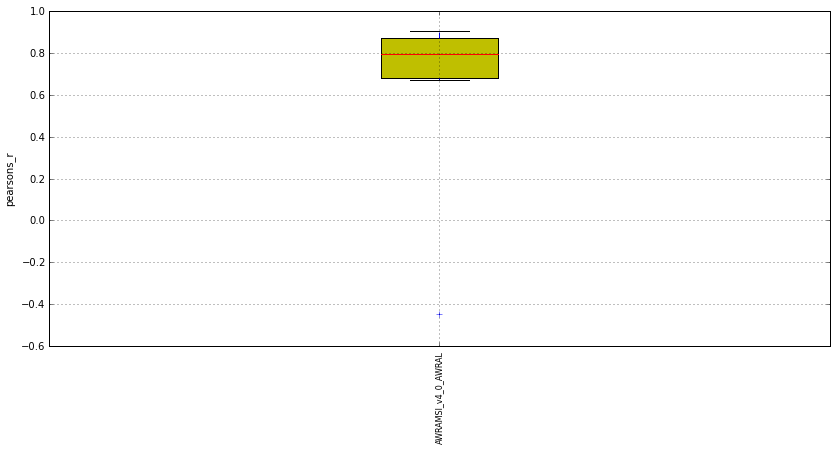

In [21]:
p = b.benchmark.plot_box('pearsons_r', freq='m')

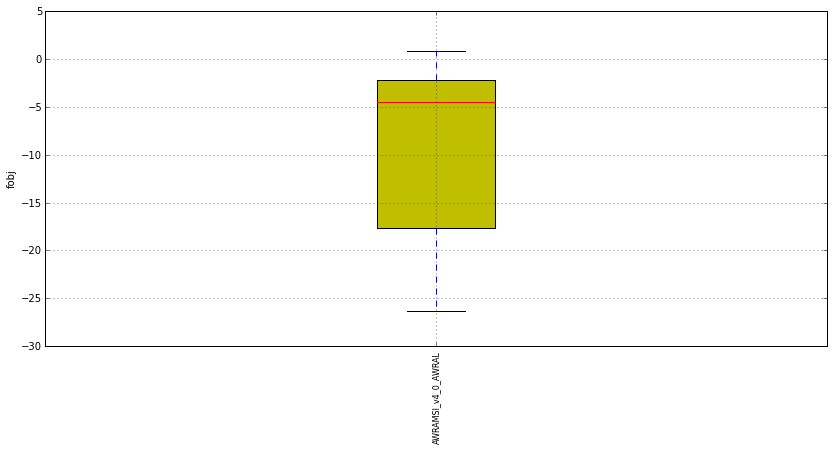

In [22]:
p = b.benchmark.plot_box('fobj', freq='m')

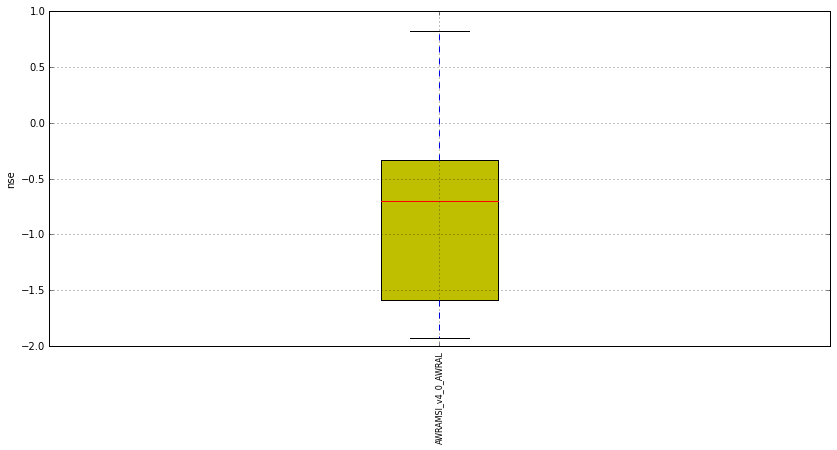

In [23]:
p = b.benchmark.plot_box('nse', freq='m') #, ylim=[0,1])

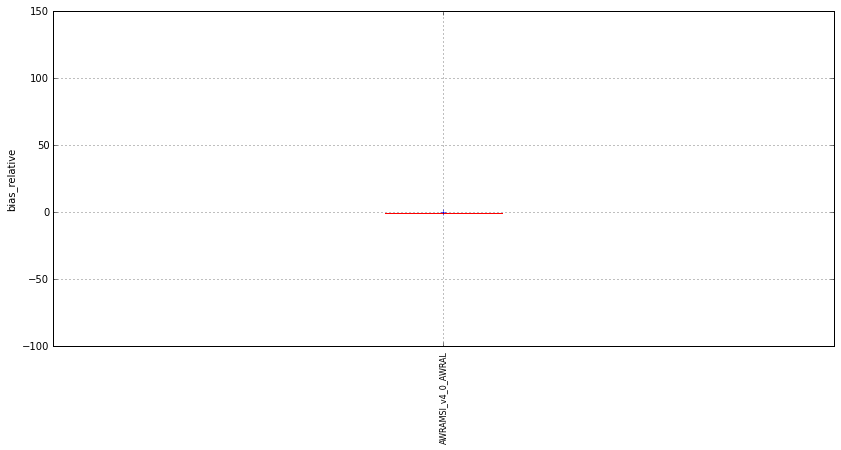

In [24]:
p = b.benchmark.plot_box('bias_relative', freq='m', ylim=[-100,150])

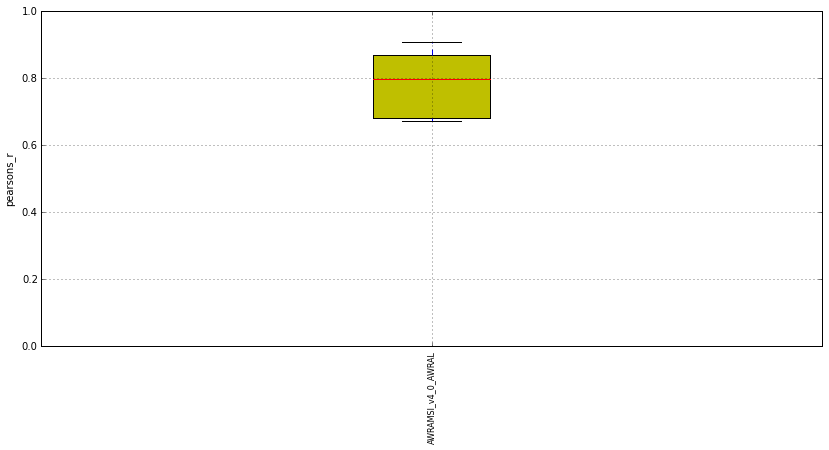

In [25]:
p = b.benchmark.plot_box('pearsons_r', freq='m', ylim=[0,1])

## View some statistics
Summary percentiles can be printed out by specifying a statistic to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

In [26]:
b.benchmark.stat_percentiles('grand_f', freq='m')

,grand_f
AWRAMSI_v4_0_AWRAL,-5.880047


In [27]:
b.benchmark.stat_percentiles('nse')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-1.930055,-1.889715,-1.586113,-0.696294,-0.335354,0.530527,0.818599


In [28]:
b.benchmark.stat_percentiles('bias_relative')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-0.848109,-0.840875,-0.79426,-0.578303,-0.508684,-0.224481,-0.040154


In [29]:
b.benchmark.stat_percentiles('pearsons_r')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-0.447425,0.056672,0.681458,0.796542,0.869824,0.901774,0.906654
